# Implementing - Attention Basic

In [1]:
# Input for Scoring function - hidden state of decoder

dec_hidden_state = [5,1,20]

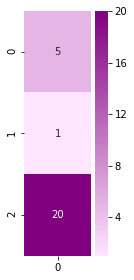

In [2]:
#visualize vector - decoder hidden state

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(1.5,4.5))
sns.heatmap(np.transpose(np.matrix(dec_hidden_state)), annot = True, cmap = sns.light_palette('purple', as_cmap = True))

In [3]:
annotation = [3, 12, 45]

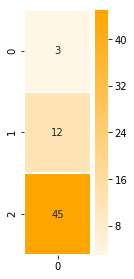

In [4]:
# scoring single annotation - encoder hidden state

plt.figure(figsize = (1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(annotation)), annot = True, cmap = sns.light_palette('orange', as_cmap = True), linewidths = 1)

In [5]:
# Implement - Scoring a single Annotation

enc_hidden_state = annotation

def single_dot_attention_score(dec_hidden_state, enc_hidden_state):
    return np.dot(dec_hidden_state, enc_hidden_state)

single_dot_attention_score(dec_hidden_state, enc_hidden_state)
    

927

In [6]:
# Annotation Matrix

annotations = np.transpose([[3,12,45], [59,2,5], [1,43,5],[4,3,45.3]])

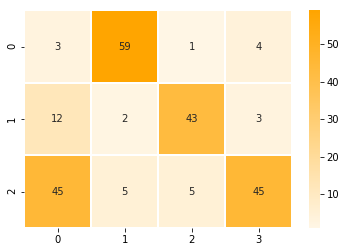

In [7]:
# visualizing Annotation

ax = sns.heatmap(annotations, annot=True, cmap = sns.light_palette('orange', as_cmap = True), linewidths = 1)

In [8]:
# Implementing- Scoring All Annotations at Once

def dot_attention_score(dec_hidden_state, annotations):
    return np.matmul(np.transpose(dec_hidden_state), annotations)

attention_weights_raw = dot_attention_score(dec_hidden_state, annotations)

attention_weights_raw

array([927., 397., 148., 929.])

In [9]:
#Softmax

def softmax(x):
    x = np.array(x, dtype = np.float128)
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=0)

attention_weights = softmax(attention_weights_raw)


In [10]:
# Applying score

def apply_attention_scores(attention_weights, annotations):
    return attention_weights * annotations

applied_attention = apply_attention_scores(attention_weights, annotations)
applied_attention

array([[3.57608766e-001, 4.68881939e-230, 5.76614420e-340,
        3.52318831e+000],
       [1.43043506e+000, 1.58943030e-231, 2.47944200e-338,
        2.64239123e+000],
       [5.36413149e+000, 3.97357575e-231, 2.88307210e-339,
        3.99001076e+001]], dtype=float128)

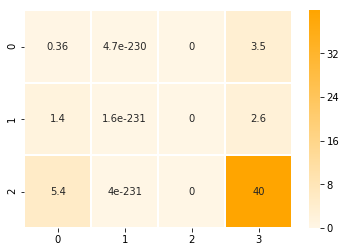

In [11]:

# Let's visualize our annotations after applying attention to them
ax = sns.heatmap(applied_attention, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)


In [12]:
#calculating attention context vector


def calculate_attention_vector(applied_attention):
    return np.sum(applied_attention, axis=1)

attention_vector = calculate_attention_vector(applied_attention)
attention_vector

array([ 3.88079708,  4.0728263 , 45.26423912], dtype=float128)

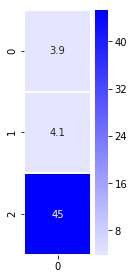

In [13]:

# Let's visualize the attention context vector
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(attention_vector)), annot=True, cmap=sns.light_palette("Blue", as_cmap=True), linewidths=1)